# Probability Fundamentals

## Table of Contents

### Introduction
 A First Glimpse into Conditional Probability**: Introducing the concept of conditional probability in data analysis.

### Probabilities
Understanding the fundamentals of probability, an essential part of statistical analysis.
* **4.1 Probability Rules**: Covering the basic rules and principles that govern the concept of probability.
* **4.2 Binomial Distribution**: Exploring the binomial distribution, a key concept in probability theory.
* **4.3 Central Limit Theorem**: Understanding of the central limit theorem and its importance in statistics.
* **4.4 Monte Carlo Simulations**: Implementing Monte Carlo methods to understand complex systems and uncertainty.

In [2]:
# --------------------------------------------------------------------------------
    # YOU DON'T NEED TO UNDERSTAND HOW TO OPEN THIS FILE, BUT I LEAVE THE CODE FOR YOU
# --------------------------------------------------------------------------------

# Function to convert a string to an integer.
# If the string is empty or contains only spaces, it returns 0.
def chr_int(a):
    if a.strip() == '':  # Check if the string is empty or spaces
        return 0
    else:
        return int(a)    # Convert the string to an integer

# Try to open the file and read its contents
try:
    # Open the file using 'with' statement for better resource management
    with open('files/2002FemPreg.dat', 'r') as file:
        preg = []  # Initialize an empty list to store the data

        # Iterate over each line in the file
        for line in file:
            try:
                # Extract specific fields from the line using string slicing
                # and convert them to integers. If slicing goes wrong, ValueError will be raised
                record = [int(line[:12]), int(line[274:276]), int(line[276]), chr_int(line[277:279])]
                preg.append(record)  # Append the processed record to the list
            except ValueError as e:  # Catch and handle ValueError
                print(f"Error processing line: {line}")
                print(f"Error message: {e}")
                # You can choose to break, continue, or pass based on your error handling preference

    # Print the first record and the total number of records for verification
    print('First record:', preg[0])
    print('The number of entries is:', len(preg))

except FileNotFoundError:  # Catch and handle the FileNotFoundError
    print("File not found. Please check the file path.")

First record: [1, 39, 1, 1]
The number of entries is: 13593


In [8]:
# Importing the pandas library
import pandas as pd
import seaborn as sns

# Creating a DataFrame from the 'preg' list
df = pd.DataFrame(preg)

# Assigning column names to the DataFrame for clarity
df.columns = ['caseId', 'prgLength', 'outcome', 'birthOrd']

In [4]:
df2 = df.drop(df.index[(df.outcome == 1) & 
                       (df['prgLength'] > df['prgLength'].median() + 6)])

df3 = df2.drop(df2.index[(df2.outcome == 1) & 
                         (df2['prgLength'] < df2['prgLength'].median() - 10)])

### Theoretical Background on Conditional Probability

Conditional probability is a measure of the probability of an event occurring, given that another event has already occurred. This concept is essential in probability theory and statistics, allowing for more accurate predictions and analyses in various contexts.

The conditional probability of an event $( A )$ given that event $( B )$ has occurred is denoted as $P(A|B)$ and is calculated using the formula:

$ P(A|B) = \frac{P(A \cap B)}{P(B)} $

Here, $ P(A \cap B) $ is the probability of both $( A )$ and $( B )$ occurring, and $( P(B) )$ is the probability of $( B )$ occurring.

![](https://assets.tivadardanka.com/2022_10_conditional_probability_featured_c9d47cc379.jpg)

### Applying Conditional Probability to Birth Timing

In the scenario of birth timing, we consider two specific questions:

#### Question 1: Probability of Birth in Week 39

- **Event X**: The baby is born in week 39.
- **Event Y**: The baby hasn't been born during weeks 0-38.
- To calculate $( P(X|Y) )$, the probability of the baby being born in week 39 given it hasn't been born by week 38, we need to consider the proportion of births that happen in week 39 out of all births that have not occurred before week 39.

#### Question 2: Probability for a First Baby

- **Event Y** now also includes the condition that it's a first baby.
- The conditional probability $( P(X|Y) )$ may change because the birth patterns for first-time births can differ from subsequent births.

### Detailed Explanation

1. **Calculation for General Births:**
    - If data indicates that, for example, 70% of babies not born by week 38 are born in week 39, then $( P(X|Y) = 70\% )$.

2. **Calculation for First-Time Births:**
    - If the likelihood changes for first babies, and the data shows 80% of first babies not born by week 38 are born in week 39, then $( P(X|Y) = 80\% )$ for first babies.

3. **Implications in Real-World Contexts:**
    - This probability is useful for expecting parents and healthcare providers to estimate birth timing.
    - It demonstrates how additional information (like being a first baby) can refine probability estimates.

In summary, conditional probability provides a way to adjust and refine probabilities based on additional information or conditions. In childbirth, it helps to estimate more accurately the likelihood of birth at different gestational stages, particularly when considering factors like first-time births.

A simple way to compute these chances is to drop from our data the cases that do not fulfill the conditions and then renormalize.

In [5]:
df4 = df3.drop(df3.index[df3['prgLength'] < 39]) 

We are ready to compute the probability that the baby will be born in the week 39 for a pregnant woman in the beginning of week 39.

In [6]:
print(len(df4[(df4.prgLength == 39)].index)/float(len(df4)))

0.6789752397309289


Let's now add the second condition.

<AxesSubplot:>

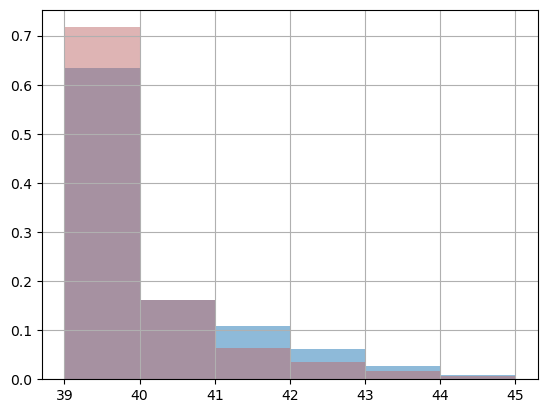

In [9]:
fb39 = df4[(df4.birthOrd == 1)]
ob39 = df4[(df4.birthOrd > 1)]

fb39['prgLength'].hist(bins=6,  density=True, alpha=.5)   # default number of bins = 10, blue
ob39['prgLength'].hist(bins=6,  density=True, alpha=.5, color=sns.desaturate("indianred", .75))

In [10]:
print('Probability First baby to be born on week 39:', 
    len(fb39[(fb39.prgLength == 39)].index)/
    float(len(fb39.index)))

Probability First baby to be born on week 39: 0.634644250975683


In [11]:
print('Probability non first baby to be born on week 39:',
    len(ob39[(ob39.prgLength == 39)].index)/
    float(len(ob39.index)))


Probability non first baby to be born on week 39: 0.7169863775368363


### Discussions.

After exploring the data we have seen some **appearent effects** that seem to support our first hypothesis:

+ **Data description**: The mean pregnant lenght for first babies is 38.76 and for other babies is 38.65.

+ **Relative risk**: First babies are about 67% more likely to be late.

+ **Conditional probability**: If someone is pregnant and it is the beginning of week 39, the chance (63% vs. 72%) that the baby will be born in the week 39 is lower if it is the first baby.


#### Exercises: Other possible experiments

We can compare the first and others for the same woman. While it may be unlikely it could still be that a tendency exists for a woman's second, third, etc, child comes earlier.

<small>(Result:  The second baby is born about some hours earlier, but this difference is not *statistically significant*.)<small>

In [ ]:
# Exercise 1: Disease Testing
# Suppose 1% of a population has a certain disease. A test for the disease is 99% accurate.
# What is the probability that a person has the disease given they tested positive?

In [ ]:
# Exercise 2: Coin Toss
# You have a fair coin (equal probability of heads or tails) and a biased coin (75% heads, 25% tails).
# You pick one coin at random and toss it, getting heads. What is the probability you picked the biased coin?

In [ ]:
# Exercise 3: Card Draw from a Deck
# From a standard deck of cards (52 cards), you draw one card. 
# What is the probability that it is a heart, given that it is a red card?

In [ ]:
# Exercise 4: Rain and Traffic
# It is known that there's a 40% chance of rain today. If it rains, the probability of traffic congestion is 70%.
# If it does not rain, the probability of traffic congestion is 30%. 
# What is the probability that it will rain today given that there is traffic congestion?

In [ ]:
# Exercise 5: First Child Birth
# In a hospital, data shows that 60% of deliveries are first-time births.
# Of the first-time births, 30% are by cesarean section. 
# Of the non-first-time births, 20% are by cesarean section.
# What is the probability that a randomly selected cesarean section birth is a first-time birth?

## 4. Probabilities

### Probability Rules

Probability is the branch of mathematics that deals with the likelihood of different outcomes. It provides a quantifiable measure to predict how likely events are to occur.

#### Definition of Probability

The most common definition of **probability** is a *frequency expressed as a fraction* of the universe of possible outcomes. This means probability is a real value between 0 and 1, where 0 indicates impossibility and 1 indicates certainty. Probabilities aim to quantify the idea that some things are more likely to happen than others.

- #### Frequentism

    Frequentism is a traditional approach to probability, focusing on the frequency or proportion of outcomes in a large number of trials. It is based on the idea that probability can be determined by conducting experiments or observations and counting the frequency of outcomes. 

    - **Key Concept**: Probability as Long-Run Frequency
        - In Frequentism, probability is interpreted as the limit of its relative frequency in a large number of trials. 
        - For example, consider tossing a fair coin many times. As the number of tosses increases, the relative frequency of getting heads will tend to stabilize around 0.5. This stable value is considered the probability of getting heads.

    - **Application in Experiments**:
        - Frequentism is commonly used in scientific experiments and studies. For instance, if a new drug is tested on a large group of people and 45% show improvement, a frequentist would interpret this as the probability of the drug's effectiveness being 45%.

- #### Bayesianism

    Bayesianism takes a different approach by incorporating prior knowledge or belief into the calculation of probability. It is named after Thomas Bayes, who formulated the famous Bayes' Theorem.

    - **Key Concept**: Probability as Degree of Belief
        - Bayesian probability is subjective and represents a degree of belief or confidence in an event occurring. This belief is updated as new evidence or information becomes available.
        - Bayesianism allows the use of prior knowledge or existing information to influence the calculation of probability.

    - **Practical Example**:
        - Consider the question: "What is the probability that Thaksin Shinawatra is the Prime Minister of Thailand?" 
        - A Bayesian approach would start with an initial belief (prior probability) based on existing knowledge (e.g., historical data, news, etc.) and update this belief as new information becomes available (like recent election results).

    - **Bayes' Theorem**:
        - Bayes' Theorem is central to Bayesian probability. It provides a way to update the probability of a hypothesis as more evidence or information is acquired.
        - The theorem combines the prior probability, the likelihood of the current evidence under different hypotheses, and the overall probability of the evidence to give an updated probability (posterior probability).

- #### Differences Between Frequentism and Bayesianism

    - **Objective vs. Subjective** :
        - Frequentism is often seen as more objective, as it relies on the frequency of events in repeated trials.
        - Bayesianism is more subjective, as it depends on prior beliefs and the interpretation of new evidence.

    - **Static vs. Dynamic** :
        - Frequentist probabilities are static as they are based on long-run frequencies in repeated experiments.
        - Bayesian probabilities are dynamic and can change as new information is incorporated.

    - **Application** :
        - Frequentism is widely used in fields where outcomes can be repeatedly observed under similar conditions.
        - Bayesianism is useful in situations where incorporating prior knowledge or adjusting beliefs as new data comes in is crucial.

    Understanding these two perspectives provides a comprehensive view of probability, helping students to apply the right approach based on the context of the problem.


### Events and Trials

#### Events

The *things* to which we assign probabilities are called **events**, denoted as E. An event is any outcome or set of outcomes.

#### Trials

A *situation* in which an event might or might not happen is called a **trial**. For example, in the case of rolling a six-sided die, each roll is a trial.

- If we want to compute the probability of rolling a 6 (P(6)), each time a 6 appears is called a **success**.
- Rolls that result in any number other than 6 are called **failures**.

### Probability of Success

In a *finite series of n identical trials*, if we observe s successes, the **probability of the success** is calculated as s/n. This ratio is a fundamental principle in probability, representing the frequency of success in repeated, independent trials.

For example, if we roll a die 100 times and get a 6 on 20 of those rolls, the probability of rolling a 6, based on our experiment, is 20/100 or 0.20.

### Binomial Distribution

The binomial distribution is a probability distribution that summarizes the likelihood that a value will take one of two independent states across a series of trials. For example, it can represent the probability of getting a certain number of heads in a series of coin tosses.

### Monte Carlo Methods

Monte Carlo methods are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. They are often used in situations where it is difficult or impossible to compute an exact result with a deterministic algorithm.

---

This overview provides a foundational understanding of probability, differentiating between frequentist and Bayesian approaches, and introducing key concepts like events, trials, and the probability of success.




### 4.1 Probability Rules

Probability rules help us understand how different events relate to each other. We'll look at two key rules: one for non-independent events and another for independent events.

#### Non-Independent Events

When events A and B are not independent, the occurrence of one affects the probability of the other. The rule for such cases is:

$$ P(A|B) = \frac{P(A \mbox{ and } B)}{P(B)}$$

- This formula calculates the probability of event A occurring given that B has already occurred.
- From this, we can derive: 
$$P(A \mbox{ and } B) =  P(B|A) P(A) = P(A|B) P(B) $$

##### Example of Non-Independent Events:

- **Drawing Cards from a Deck Without Replacement**: 
    - Suppose you have a standard deck of 52 cards. You draw one card, and it's a heart. Without putting it back, you draw another card. The probability of the second card being a heart has changed because the first draw affects the second. Here, the events are not independent.

#### Independent Events

Events A and B are independent if the occurrence of one does not affect the probability of the other. The rule for independent events is:

$$P(A \mbox{ and } B) = P(A) P(B)$$. 

- This formula indicates that the probability of both A and B occurring is the product of their individual probabilities.

##### Example of Independent Events:

- **Tossing Coins**: 
    - If you toss a fair coin twice, the result of the first toss doesn't affect the result of the second. These are independent trials. 
    - The probability of getting heads on the first toss is $( \frac{1}{2} )$, and the same for the second toss. So, the probability of getting heads on both tosses is $( \frac{1}{2} \times \frac{1}{2} = \frac{1}{4} )$.

#### Understanding Independence

- A and B are **independent** if knowing that A occurred does not change the probability of B occurring, and vice versa.
- In real-life scenarios, whether events are independent or not can significantly impact how probabilities are calculated and interpreted.

These rules form the foundation of probability theory and are crucial for understanding more complex probabilistic phenomena.


**Exercises on Conditional Probability:**

1. **Three Children Scenario**:
   - If you have three children, what is the probability that all of them are girls?

2. **At Least One Girl in Three Children**:
   - If you have three children and you know at least one of them is a girl, what is the probability that all three are girls?

3. **Specific Birth Order**:
   - If you have three children and you know the first child is a girl, what is the probability that the other two are also girls?

4. **At Least One Boy in Four Children**:
   - If you have four children and know that at least one of them is a boy, what is the probability that exactly two are boys?

5. **Twins and a Third Child**:
   - If you have three children, including a pair of twins, and you know that at least one of the twins is a girl, what is the probability that the third child is also a girl?

6. **Birthdays and Gender**:
   - If you have three children, and you know that at least one girl was born on a Tuesday, what is the probability that you have two or more girls?

In [ ]:
## Your solutions

### More Probability Rules

Understanding different types of events and how they interact is key in probability theory. Two important concepts are mutually exclusive events and the general rule for the probability of the union of two events.

- #### Mutually Exclusive Events

    - Two events are **mutually exclusive** if they cannot occur at the same time. In other words, the occurrence of one event excludes the possibility of the other event happening.

    - **Mathematical Representation**:
        $[ P(A | B) = P(B | A) = 0 ]$
        - This means the probability of A happening given B has occurred (and vice versa) is zero.
        - For example, when rolling a single die, the events 'rolling a 3' and 'rolling a 5' are mutually exclusive.

    - **Probability of Either Event**:
        $[ P(A \text{ or } B) = P(A) + P(B) ]$
        - For mutually exclusive events, the probability of either A or B occurring is the sum of their individual probabilities.
        - For instance, in a deck of cards, the probability of drawing either a heart or a club is $( \frac{1}{4} + \frac{1}{4} = \frac{1}{2} )$.

- #### Non-Mutually Exclusive Events

    When events A and B are not mutually exclusive, they can occur at the same time. In such cases, the rule to calculate the probability of either event happening is different.

    - **General Rule for Union of Events**:
    $[ P(A \text{ or } B) = P(A) + P(B) - P(A \text{ and } B) ]$
        - This formula accounts for the intersection of A and B (i.e., the probability of both A and B occurring) to avoid double counting.
        - For example, in a deck of cards, the probability of drawing a heart or a king is $( \frac{1}{4} + \frac{1}{13} - \frac{1}{52} )$.

- #### Understanding the Difference

    - **Mutually Exclusive**: No overlap between events. The occurrence of one event excludes the other.
    - **Non-Mutually Exclusive**: Potential overlap. The occurrence of one event does not exclude the possibility of the other.

    Recognizing whether events are mutually exclusive or not is essential in correctly applying these probability rules and avoiding common mistakes in probabilistic reasoning.

**Exercises**: Counting is the most basic skill to solve probability problems.

+ Q: For example, if I flip two coins, the chance of getting at least one tail is: 1/2 + 1/2-1/4=3/4?!
+ Q: If I roll two dices and the total is 8, what is the probability that one of the dice is 6?
+ Q: If I roll 100 dice, what is the probability of getting all sixes? 
+ Q: What is the probability of getting no sixes?
+ Q: What is the probability of getting at least one six?


In [ ]:
#Your solution here

## 4.2 Binomial Distribution

The binomial distribution is a fundamental probability distribution in statistics, used to model the number of successful outcomes in a fixed number of trials in an experiment.

![](https://d1whtlypfis84e.cloudfront.net/guides/wp-content/uploads/2018/09/03051417/11.jpg)

### Definition of Binomial Distribution

A binomial distribution describes the probability of obtaining exactly $( k )$ successes in $( n )$ independent trials of a binary experiment. The experiment can result in just two possible outcomes, often termed as "success" and "failure".

However, the Bernoulli distribution and the binomial distribution are intrinsically linked:

1. **Bernoulli Distribution**: This is the simplest case of the binomial distribution, where a single trial is conducted. It has only two possible outcomes: success (with probability $( p )$) and failure (with probability $( 1-p )$). Essentially, a Bernoulli distribution is a binomial distribution with $( n=1 )$. [Bernoulli explained](https://www.youtube.com/watch?v=nl9WiZMZnYs&ab_channel=365DataScience)

2. **Binomial Distribution**: This is a generalization of the Bernoulli distribution to $( n )$ independent trials. It represents the number of successes in $( n )$ independent Bernoulli trials, each with the same probability of success $( p )$. The key here is the independence of trials and the constant probability across each trial.[Binomial distribution](https://www.youtube.com/watch?v=_FbZI9mtSSM&ab_channel=365DataScience)

So, the Bernoulli distribution is a special case of the binomial distribution. When you're dealing with more than one trial, and you're interested in the number of successes across those trials, you're working with a binomial distribution. But if you're just looking at one trial, it's a Bernoulli distribution. They are both foundational to understanding binary outcomes in probability theory.


### Probability Mass Function (PMF)

The Probability Mass Function (PMF) of a binomial distribution, which gives the probability of obtaining \( k \) successes in \( n \) trials, is defined as:

$$[ PMF(k) = {n \choose k} p^k (1-p)^{(n-k)} ]$$

where:

- $( {n \choose k} )$ is the binomial coefficient, representing the number of ways to choose $( k )$ successes out of $( n )$ trials. [Binomial coefficient explained](https://www.youtube.com/watch?v=WHztDZECzlM&t=155s&ab_channel=TheBrightSideofMathematics)
- $( p )$ is the probability of success on an individual trial.
- $( 1-p )$ is the probability of failure on an individual trial.
- $( n )$ is the number of trials.
- $( k )$ is the number of successes.

### Binomial Coefficient

The binomial coefficient $( {n \choose k} )$ is calculated using the formula:

$[ {n \choose k} = \frac{n!}{k!(n-k)!} ]$

where $( n! )$ (n factorial) is the product of all positive integers up to $( n )$.

### Characteristics of Binomial Distribution

- **Discrete**: The binomial distribution is discrete, as it only deals with counts of successes and failures.
- **Dependence on $( p )$ and $( n )$**: The shape of the binomial distribution depends on the values of $( p )$ and $( n )$. It can be symmetric or skewed depending on these parameters.
- **Examples**: Tossing a coin a certain number of times and counting the number of heads, or conducting a survey and counting the number of positive responses.

### Application

Binomial distributions are widely used in scenarios where the outcomes of each trial are binary, such as pass/fail, yes/no, or win/lose situations. They provide a powerful tool for understanding the variability and probabilities in such processes.

Understanding the binomial distribution is key to many areas of statistics and forms the basis for the analysis of binary outcomes in various fields.

*Quality control*

In [18]:
from scipy.stats import binom

# For a manufacturing process, there is always a chance of producing defective items.
# Assume there is a 2% chance of an item being defective.
# We want to find the probability of finding exactly 5 defective items in a batch of 100.

n = 100  # Total number of items in a batch
p = 0.02  # Defect rate (probability of an item being defective)

k = 5  # Number of defective items we're calculating the probability for
prob = binom.pmf(k, n, p)  # pmf is the probability mass function for binomial distribution
print(f"Probability of finding exactly {k} defective items: {prob}")

Probability of finding exactly 5 defective items: 0.035346804727720935


*Call centers*

In [19]:
# In a call center, not all callers are willing to wait to be connected to an operator.
# Suppose there's a 10% chance of a caller hanging up before connection.
# We want to calculate the probability of exactly 10 callers hanging up out of the next 100 calls.

n = 100  # Number of callers
p = 0.10  # Probability of a caller hanging up

k = 10
# Desired number of hang-ups to calculate probability for
prob = binom.pmf(k, n, p)  # Using the binomial probability mass function
print(f"Probability of exactly {k} callers hanging up: {prob:.4f}")

Probability of exactly 10 callers hanging up: 0.1319


*Finance and investing*

In [ ]:
# The stock market is unpredictable, but sometimes investors use historical data to make predictions.
# If a stock has a 55% chance of increasing in value on any given day,
# an investor might want to know the probability of the stock increasing 20 out of 30 days.

n = 30  # Number of days
p = 0.55  # Probability of stock increasing in value in a single day

k = 20  # Number of days the investor is hoping the stock will increase
prob = binom.pmf(k, n, p)  # Calculate the probability with binomial distribution
print(f"Probability of stock going up exactly {k} times: {prob:.4f}")

*Marketing Campaigns*

In [ ]:
# Marketing teams often send out advertisements and want to predict the response rate.
# If sending out 10,000 flyers with an expected 1% response rate,
# the binomial distribution can predict the probability of receiving a certain number of responses.

n = 10000  # Number of flyers sent
p = 0.01  # Expected response rate

k = 150  # Number of responses we want to find the probability for
prob = binom.pmf(k, n, p)  # Probability of receiving exactly k responses
print(f"Probability of receiving exactly {k} responses: {prob:.4f}")

*Loan defaults*

In [ ]:
# Banks and financial institutions often assess the risk of loan portfolios.
# If there's a 5% chance of default on an individual loan, they might calculate the probability
# of a certain number of defaults in a portfolio of 1000 loans.

n = 1000  # Total number of loans
p = 0.05  # Probability of default on an individual loan

k = 50  # Number of defaults to calculate probability for
prob = binom.pmf(k, n, p)  # Calculating the probability using binomial distribution
print(f"Probability of exactly {k} loans defaulting: {prob:.4f}")

## 4.3 Central Limit Theorem

The Central Limit Theorem (CLT) is a fundamental concept in statistics, and it plays a crucial role in explaining why the normal distribution is so pervasive in various fields.[Central Limit Theorem](https://www.youtube.com/watch?v=b5xQmk9veZ4&ab_channel=365DataScience)

#### The Central Limit Theorem Explained

The Central Limit Theorem states that:

> If you take the mean of $( n )$ random samples from any arbitrary distribution with a well-defined standard deviation $( \sigma )$ and mean $( \mu )$, as $( n )$ gets larger, the distribution of the sample mean will converge to a Gaussian (normal) distribution with mean $( \mu $) and standard deviation $( \frac{\sigma}{\sqrt{n}} )$.

#### Key Aspects of the CLT

- **Applicability to Any Distribution**: The CLT is remarkable because it applies to any distribution, no matter its shape, as long as the distribution has a well-defined mean and standard deviation.
- **Sample Size and Normal Distribution**: As the sample size increases, the distribution of the sample means tends toward a normal distribution, regardless of the shape of the original data distribution.
- **Mean and Standard Deviation of the Sample Means**: The mean of these sample means will equal the population mean (\( \mu \)), and their standard deviation (also called the standard error) will be \( \frac{\sigma}{\sqrt{n}} \).

#### Why is the CLT Significant?

- **Ubiquity of the Normal Distribution**: The CLT helps to explain why normal distributions are commonly observed in real-world data—even when the underlying data does not follow a normal distribution.
- **Foundation for Statistical Methods**: This theorem underlies many statistical methods, such as hypothesis testing and confidence intervals. It allows for inferences about population parameters even when the distribution of the population is unknown.
- **Practical Implications**: In practical terms, the CLT means that average measurements from random samples (like the average height from a sample of people) will tend to form a normal distribution, even if individual measurements themselves do not.

#### Applications and Implications

The CLT has widespread applications across various domains, from natural and social sciences to engineering and economics. It allows researchers and practitioners to use the powerful tools of normal distribution, even in situations where the data does not initially appear to fit this model.

In essence, the Central Limit Theorem provides a bridge between the theory of probability and the practice of statistics, justifying the use of the normal distribution as a model in many practical situations.


### Example Central Limit Theorem in Business: Daily Sales Analysis

In this exercise, we'll explore the Central Limit Theorem (CLT) using a practical business example. We will simulate a common scenario in retail - daily sales. Understanding the CLT can be crucial in business for making predictions and understanding data trends.

#### Scenario: Retail Store Daily Sales

In a retail environment, daily sales can vary significantly and might not follow a normal distribution. However, by applying the CLT, we can understand how the average sales over time behave, which is critical for inventory management, staffing, and financial forecasting.

#### Objective

The aim is to simulate daily sales data, compute sample means over different sample sizes, and observe how these sample means form a distribution. According to the CLT, as the sample size increases, the distribution of the sample means should approximate a normal distribution, regardless of the shape of the original sales data distribution.

#### Python Simulation

The provided Python code carries out the following steps:
1. Generates random daily sales figures assuming a uniform distribution (non-normal).
2. Calculates sample means for different sample sizes.
3. Plots the distribution of these sample means.
4. Fits a normal distribution over the sample means to visualize the CLT.

This practical example will demonstrate the power of the CLT in a business context, showcasing its relevance and application in everyday data analysis tasks in the retail industry.


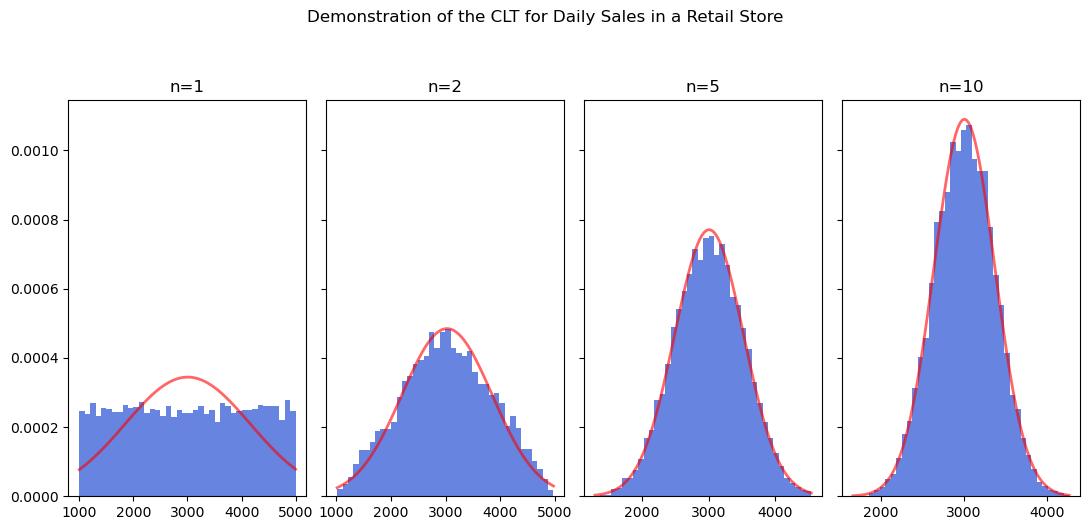

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Setting up a demonstration of the Central Limit Theorem (CLT) using daily sales data
fig, ax = plt.subplots(1, 4, sharey=True, squeeze=True, figsize=(11, 5))

# Assume sales amounts are uniformly distributed between $1000 and $5000
lower_bound, upper_bound = 1000, 5000
sample_sizes = [1, 2, 5, 10]  # Different sample sizes to demonstrate the CLT

for i, n in enumerate(sample_sizes):
    # Generating random daily sales data for 'n' days
    daily_sales = np.random.uniform(lower_bound, upper_bound, (10000, n))

    # Calculating the mean of daily sales for each of the 10,000 samples
    sample_means = np.mean(daily_sales, axis=1)

    # Plotting the histogram of the sample means
    ax[i].hist(sample_means, bins=40, density=True, color=[0, 0.2, .8, .6])
    ax[i].set_title(f'n={n}')

    # Fitting a normal distribution to the sample means
    mean, std = np.mean(sample_means), np.std(sample_means, ddof=1)
    x = np.linspace(min(sample_means), max(sample_means), 100)
    normal_pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean) ** 2 / (2 * std ** 2))
    
    # Plotting the fitted normal distribution over the histogram
    ax[i].plot(x, normal_pdf, color=[1, 0, 0, .6], linewidth=2)

plt.suptitle('Demonstration of the CLT for Daily Sales in a Retail Store', y=1.05)
plt.tight_layout()
plt.show()


## 4.4 Monte Carlo Experiments

Monte Carlo experiments are a critical tool in computational statistics and mathematical analysis. They are used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables. [Monte Carlo](https://www.youtube.com/watch?v=hhBNk0xmZ9U&ab_channel=365FinancialAnalystTutorials)

### What are Monte Carlo Experiments?

Monte Carlo experiments are a broad class of computational algorithms that rely on **repeated random sampling to obtain numerical results**. The fundamental principle of these experiments is to use randomness to solve problems that might be deterministic in principle. They are especially useful for simulating systems with many coupled degrees of freedom and for calculating integrals in high dimensions.

### Key Features
- **Random Sampling**: At the heart of Monte Carlo methods is the generation of multiple, random samples.
- **Repetition**: Running simulations multiple times to obtain a distribution of an unknown probabilistic entity.
- **Estimation**: They are often used for estimating unknown parameters or distributions in statistical problems.

### Theoretical Basis

Monte Carlo methods are extensively used in fields like physical sciences, engineering, business, finance, and artificial intelligence. They are particularly valuable in situations where analytical solutions are impractical or impossible to find. The theory behind Monte Carlo experiments is grounded in statistical physics and probability theory.

### Trivial Case: Rolling a Die

**Example**: What are the chances of getting a six in one trial of rolling a fair die?

In theory, a fair die has six faces, each equally likely to land face up. Therefore, the probability of getting a six (or any other specific number) in a single roll is 1/6 or approximately 16.67%.

### Monte Carlo Approach
- **Simulation**: You can simulate rolling a die many times (e.g., 10,000 times) and count how often a six appears.
- **Estimation**: By dividing the number of times a six is rolled by the total number of rolls, you get an estimate of the probability of rolling a six.
- **Convergence**: As the number of trials increases, this estimated probability will converge to the theoretical probability (1/6).

This trivial case illustrates how Monte Carlo methods can approximate the probabilities of certain outcomes through repeated, random sampling. As the complexity of the problem increases, Monte Carlo methods become an indispensable tool for probabilistic analysis and decision-making.


*Portfolio Risk Analysis*: In finance, Monte Carlo simulations are used to model the probability of different outcomes in a financial portfolio.

In [21]:
import numpy as np

# Parameters for the simulation
years = 30
mean_return = 0.07  # Average annual return
std_dev_return = 0.15  # Standard deviation of the return
initial_investment = 100000  # Initial investment amount

# Perform Monte Carlo simulation
final_portfolio_values = []
for _ in range(10000):
    # Generate random yearly returns based on mean and standard deviation
    yearly_returns = np.random.normal(mean_return, std_dev_return, years)
    # Calculate the final portfolio value
    end_value = initial_investment * np.prod(1 + yearly_returns)
    final_portfolio_values.append(end_value)

# Analyze the results
median_portfolio = np.median(final_portfolio_values)
print(f"Median final portfolio value after {years} years: ${median_portfolio:.2f}")


Median final portfolio value after 30 years: $566673.05


*Sales Forecasting*: This Monte Carlo simulation can be used to forecast sales for a product. It takes into account the uncertainty in factors like market demand and unit price.

In [ ]:
import numpy as np

# Parameters
num_simulations = 10000
avg_demand = 10000  # average demand units
std_dev_demand = 2000  # standard deviation of demand
avg_price = 50  # average price per unit
std_dev_price = 5  # standard deviation of price

# Monte Carlo Simulation
sales_forecasts = []
for _ in range(num_simulations):
    simulated_demand = np.random.normal(avg_demand, std_dev_demand)
    simulated_price = np.random.normal(avg_price, std_dev_price)
    total_sales = simulated_demand * simulated_price
    sales_forecasts.append(total_sales)

# Analysis of Results
average_sales = np.mean(sales_forecasts)
print(f"Average Forecasted Sales: ${average_sales:.2f}")

*Project Completion Time*: Use Monte Carlo simulations to estimate the completion time of a project, considering the uncertainty in the duration of each task.

In [ ]:
# Assumptions: a project with three main tasks, each with an estimated duration
# and standard deviation.

num_simulations = 5000
task1_mean = 10  # days
task1_std = 2  # days
task2_mean = 15  # days
task2_std = 3  # days
task3_mean = 20  # days
task3_std = 4  # days

project_durations = []
for _ in range(num_simulations):
    task1_time = np.random.normal(task1_mean, task1_std)
    task2_time = np.random.normal(task2_mean, task2_std)
    task3_time = np.random.normal(task3_mean, task3_std)
    total_time = task1_time + task2_time + task3_time
    project_durations.append(total_time)

average_project_time = np.mean(project_durations)
print(f"Average Project Completion Time: {average_project_time:.2f} days")

In [ ]:
np.random.normal(task1_mean, task1_std)

## 5 Estimation

Let's think of a sequence of values: 
[-0.441, 1.774, -0.101, -1.138, 2.975, -2.138].

Can you guess which is the distribution? For example what would be its mean?

Hint: assume that it is normal distribution.


**Definition:** *Estimation* is the process of inferring the parameters (e.g. mean) of a distribution from a statistic of samples drown from a population.

For example: What is the estimated mean $\hat{\mu}$ of the following normal data?

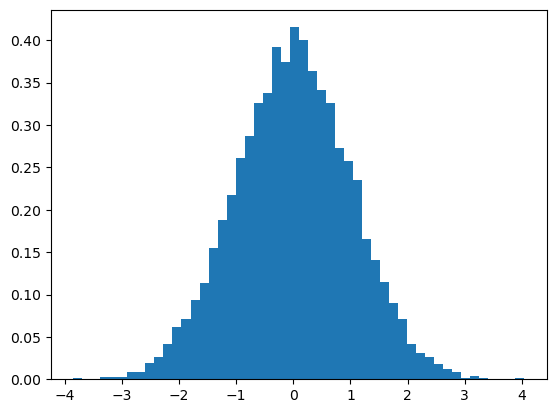

In [22]:
x = np.random.normal(0.0, 1.0, 10000)
a = plt.hist(x,50,density='True')

We can use our definition of empirical mean:

In [23]:
print('The empirical mean of the sample is ', x.mean())

The empirical mean of the sample is  -0.0027152897266846695


Let us imagine that we were reported the following data, where probably one of the data is wrong: